In [2]:
from IPython.display import Image
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
%matplotlib inline

## What is bitcoin 比特币 是什么

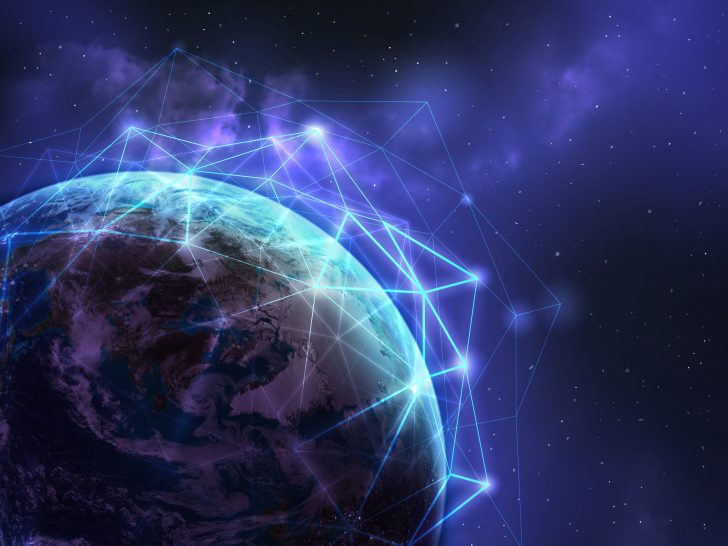

In [4]:
Image("https://www.coindesk.com/wp-content/uploads/2018/01/shutterstock_667929118-728x546.jpg", width=500, height=500)

##### It is a type of digital currency, linking node to node (or P2P)

## import bitcoin trading data from yahoo  比特币交易时间序列 
Let's call the data "blah" instead of bitcoin even though BTC is better

In [5]:
blah = pdr.get_data_yahoo('BTC-USD', start=datetime.datetime(2010, 7, 16), end=datetime.date.today())
#first few rows of data when bitcoin began to be traded. The price seem to be free. 

In [50]:
blah.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1096, freq=None)

##### There are some trades in the beginning, but the prices are zero.  It was free.

In [6]:
#beginning 5 days of the data
blah.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-07-16,0.04951,0.04951,0.04951,0.04951,0,0.04951
2010-07-17,0.08585,0.05941,0.04951,0.08584,5,0.08584
2010-07-18,0.09307,0.07723,0.08584,0.08080,49,0.08080
2010-07-19,0.08181,0.07426,0.08080,0.07474,20,0.07474
2010-07-20,0.07921,0.06634,0.07474,0.07921,42,0.07921


In [7]:
#As of Dec 28, 2018, the data set has 3088 row (since July 16, 2010)
blah.shape

(3090, 6)

In [8]:
#Change the format to make numbers display more nicely
pd.options.display.float_format = '{:20,.0f}'.format

##### Eight years later, each coin is quite expensive.

In [7]:
blah.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-26,"3,924","3,747","3,835","3,849",263439573,"3,849"
2018-12-27,"3,889","3,622","3,849","3,646",305729129,"3,646"
2018-12-28,"4,008","3,628","3,646","3,948",353705007,"3,948"
2018-12-29,"4,004","3,774","3,948","3,797",214891355,"3,797"
2018-12-30,"3,925","3,761","3,797","3,871",136877312,"3,871"


## Trading history

#### Trading volume = how much interest people have in bitcoin

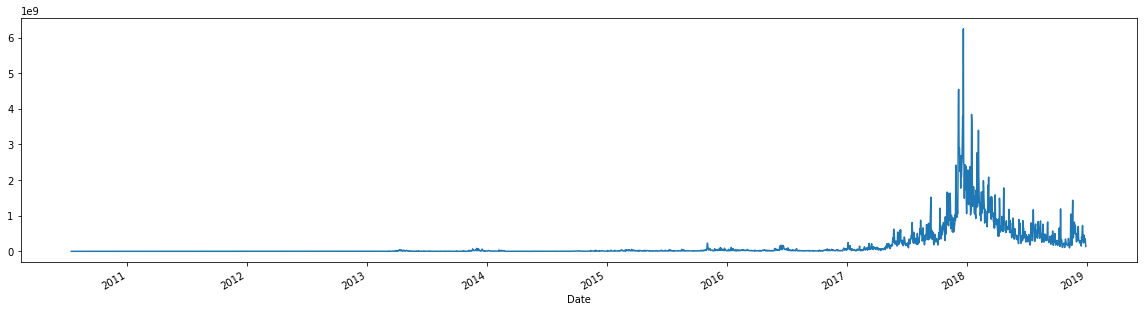

In [8]:
fig = plt.figure(figsize = (20,5))
blah.Volume.plot()

#### What did the plot tell you?
Note: Do you know what '1e9' means on the vertical axis? It means 1000000000, i.e. 10^9.  This is scientific notation. 

It shows that in 2010, there was hardly anybody trading Bitcoin.  
It was like that for a long time until 2017.  
Suddenly people traded like crazy about it in 2017.  
They did more than half of a billion trades in one single date somewhere around year end 2017.

#### Trading price = how much did/do people believe bitcoin worth

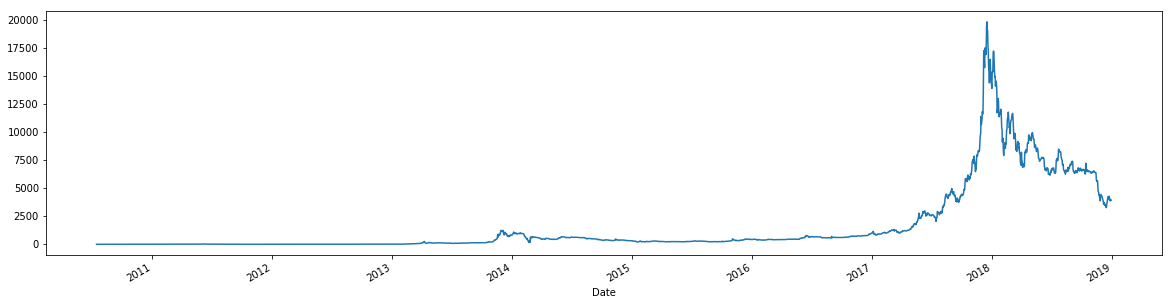

In [9]:
fig = plt.figure(figsize = (20,5))
blah.High.plot()

##### Daily High & Low prices time series
They are quite close together.

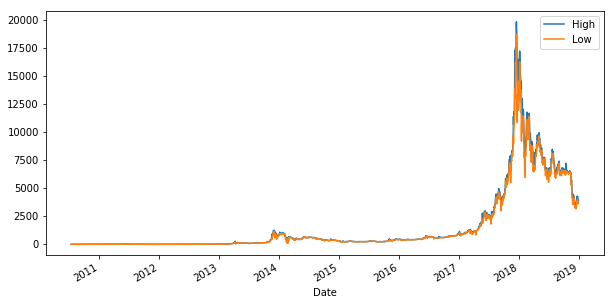

In [10]:
blah[['High','Low']].plot(figsize=(10, 5))

##### This chart has price high, low, open and close, as well as volume.  
 All the prices are very close together.  
 The purple line is volume.  Note that volume is measured on the secondary y axis. 
 Since all the prices are very similar in one day, we pick 'high' price to represent price of the day.

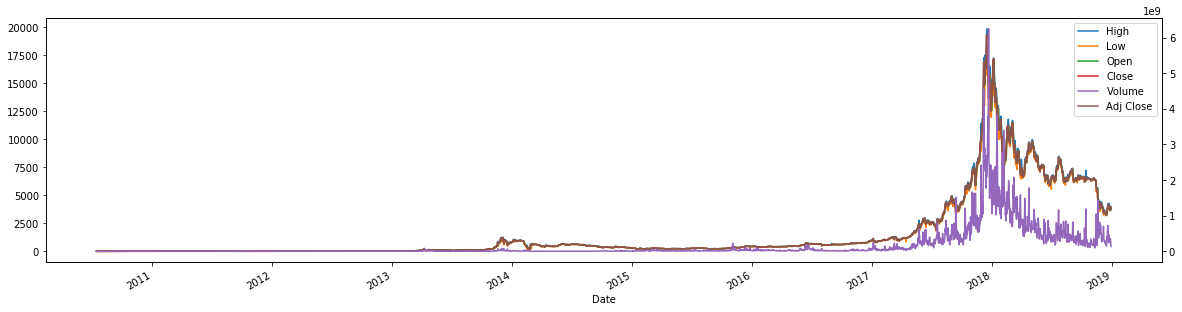

In [11]:
blah.plot(secondary_y=['Volume'], mark_right=False, figsize = (20,5))

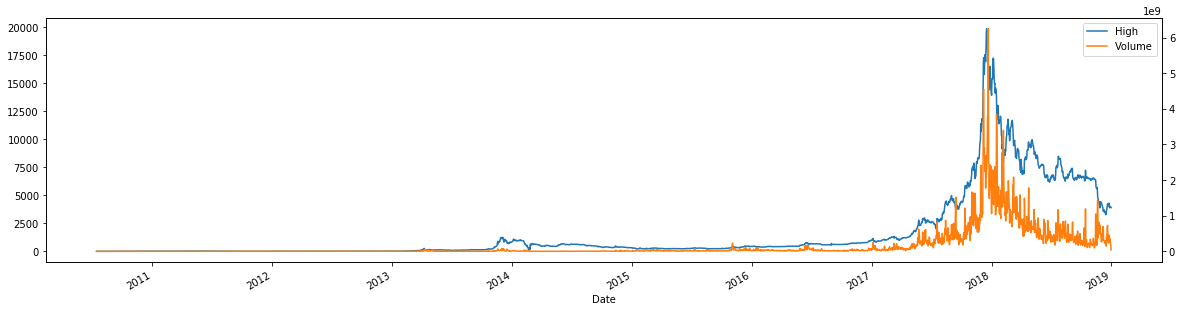

In [9]:
blah[['High',"Volume"]].plot(secondary_y=['Volume'], mark_right=False, figsize=(20, 5))


####  We can change colors easily by using readilly available color palattes or style without doing our own custom coloring

In [10]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test']


###### We try pastel, which is light and pleasant.

In [12]:
plt.style.use('seaborn-pastel')

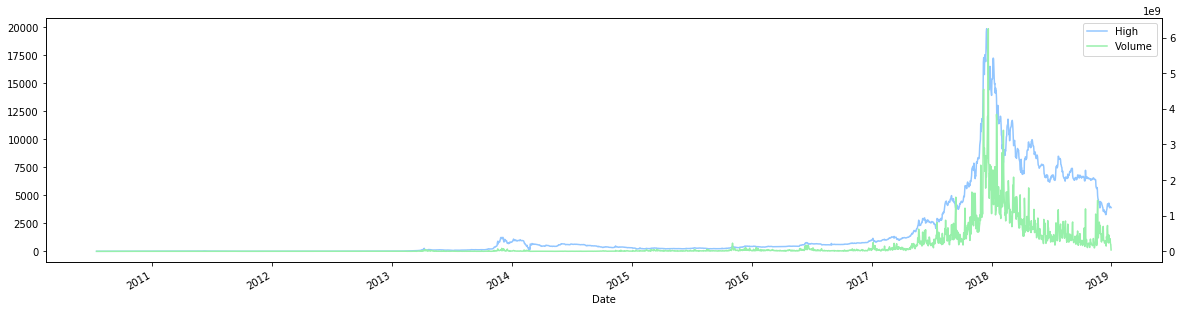

In [13]:
blah[['High',"Volume"]].plot(secondary_y=['Volume'], mark_right=False, figsize=(20, 5))

### Latest data

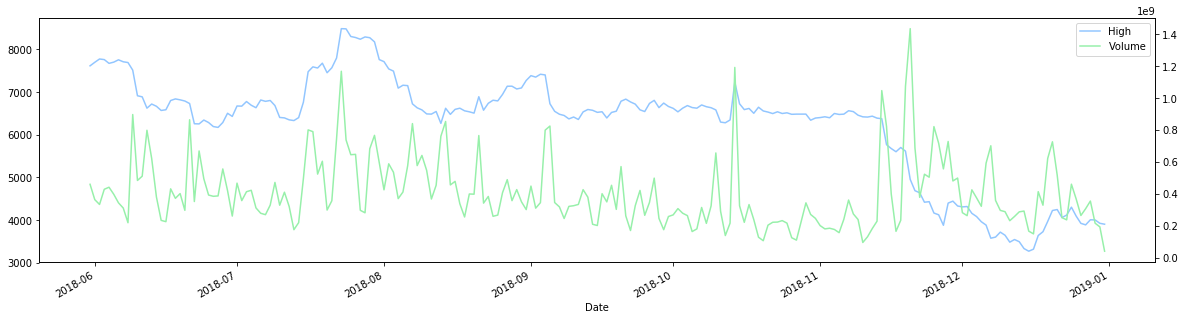

In [15]:
latest_blah = pdr.get_data_yahoo('BTC-USD', start=datetime.datetime(2018, 6, 1), end=datetime.date.today())
latest_blah[['High',"Volume"]].plot(secondary_y=['Volume'], mark_right=False, figsize=(20, 5))

## The most exuberant period

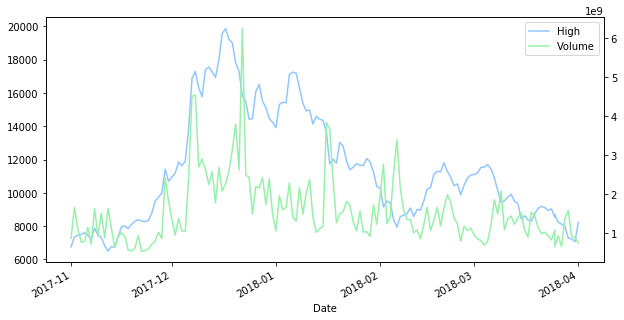

In [17]:
exuberant_blah = pdr.get_data_yahoo('BTC-USD', start=datetime.datetime(2017, 11, 1), end=datetime.datetime(2018, 4, 1))
exuberant_blah[['High',"Volume"]].plot(secondary_y=['Volume'], mark_right=False, figsize=(10, 5))

### Full price and trading volume history again, with the peak marked.

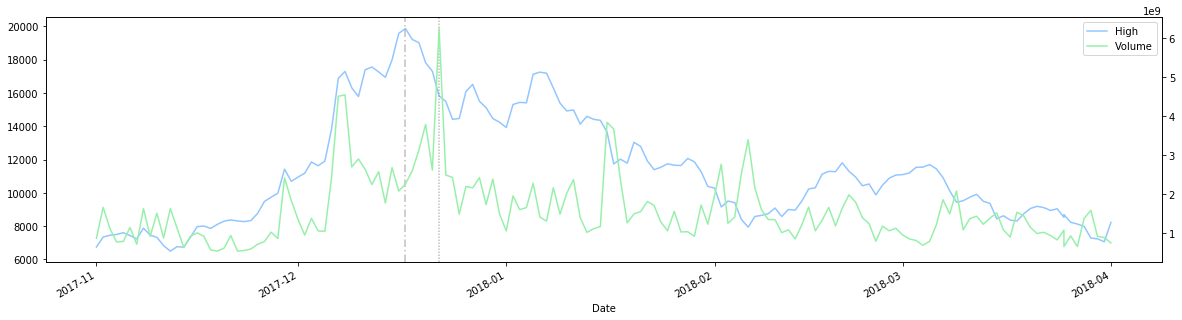

In [18]:
price_max= pd.to_datetime("2017-12-17")
volume_max =pd.to_datetime("2017-12-22")
ax=exuberant_blah[['High',"Volume"]].plot(secondary_y=['Volume'], mark_right=False, figsize=(20, 5))
ax.axvline(price_max, color ='grey', alpha=0.5, dashes=(5, 2, 1, 2))
ax.axvline(volume_max, color ='grey', alpha=0.5, dashes=(1,1))

# Changing the data

## How prices and volume change year over year

Year over year means how much prices have changed relative to the same day last year.
Similarly, week over week means change relative to the same day a week ago.
In mathematics, it is (price - price 1 week ago)/price 1 week ago.
Since bitcoin prices were zero for a long time and you cannot divide a number by zero, we will start from Jan 1, 2016.

In [68]:
blah = pdr.get_data_yahoo('BTC-USD', start=datetime.datetime(2016, 1, 1), end=datetime.date.today())

In [69]:
price_1_week_lag= blah.High.shift(7)

In [70]:
price = blah.High

In [71]:
price_df = pd.concat([price, price_1_week_lag], axis=1)
price_df.columns=["price", "price_1_week_lag"]

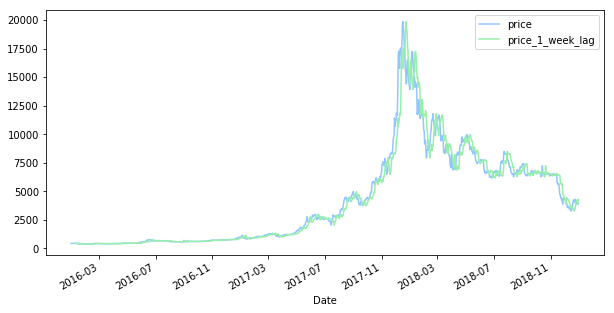

In [72]:
price_df.plot(figsize=(10,5))

Now that you understand what data shift or lag is, we will calcuate price change.

In [34]:
price_change= (blah.High -blah.High.shift(7))/blah.High.shift(7)

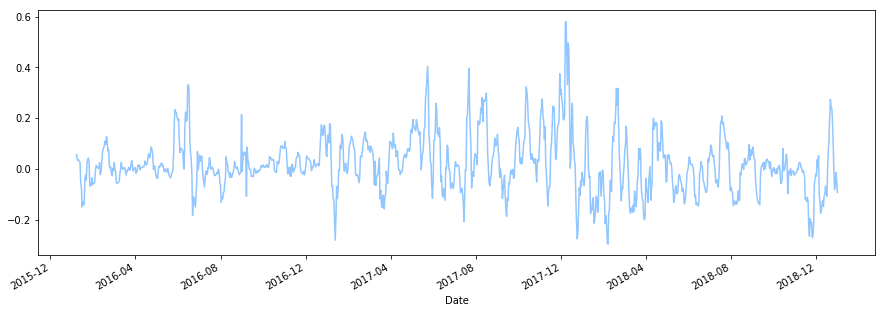

In [37]:
price_change.plot(figsize = (15,5))

## Moving average

Moving average is to take average by longer periods of time at each time point. 
For example, each day we can take the average of the last 3 days.  This new time series is a 3-day moving average. 
As another example, each day we can even take the average of the last 30 days.  
The result will be a much smoother line. The longer periods of time, the smoother the line is. 
This is because we are averaging numbers. 

In [59]:
moving = price.rolling(30, center = True)

In [60]:
ma_price_30 = pd.DataFrame({'price':price, '30 day moving average': moving.mean()})

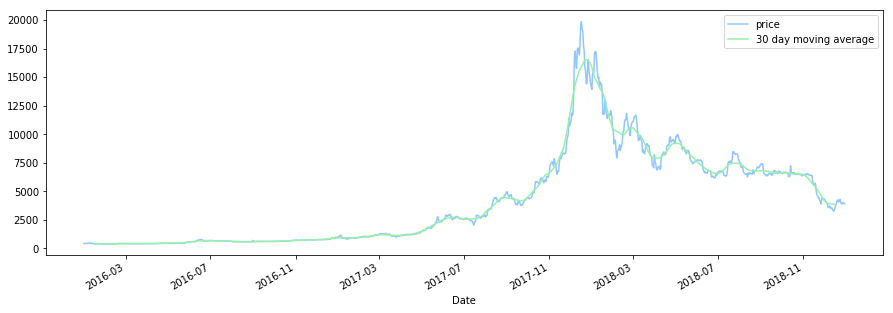

In [58]:
ma_price_30.plot(figsize = (15,5))

In [62]:
moving = price.rolling(60, center = True)
ma_price_60 = pd.DataFrame({'price':price, '60 day moving average': moving.mean()})

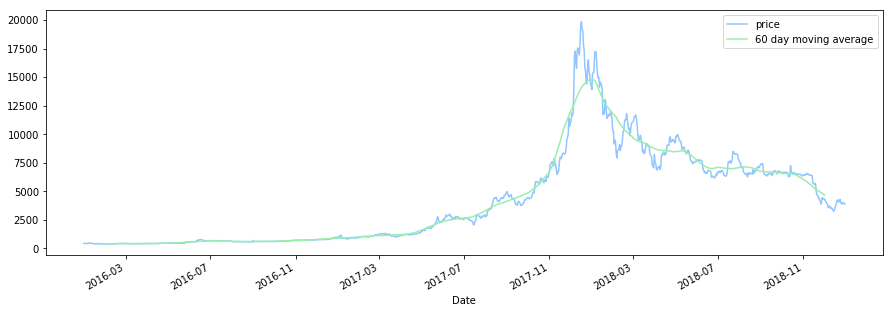

In [63]:
ma_price_60.plot(figsize = (15,5))

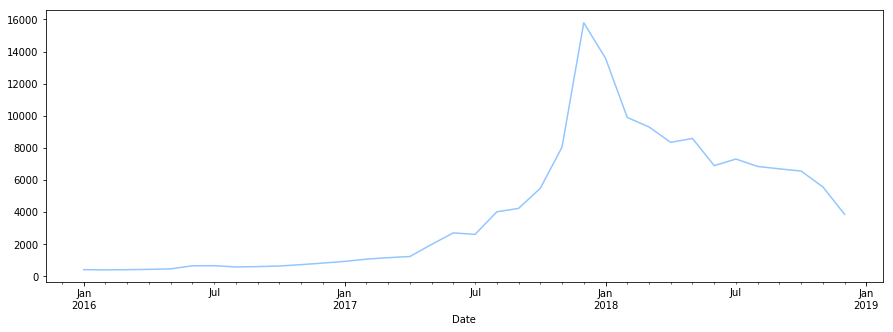

In [67]:
price.resample('M').mean().plot(figsize = (15,5))

## Pick data in even steps

Sometimes we don't want moving averages.  We may be more interested in prices every Monday, or every first day of the month.  

## Introduce concept of correlation

### Trading price is correlated with trading volume. 
In other words, these two are related.
##### But they don't go hand in hand exactly.
The peak of price is not the peak of volume.  
In fact, the daily trading data seems to show they are often moving in opposite directions.
Even though the graph shows in general the movements are similar.

#### Correlation means how much one thing is related to another, whether in a positive or negative way

In [19]:
corr =blah[['High',"Volume"]].corr()
corr

,High,Volume
High,1,1
Volume,1,1


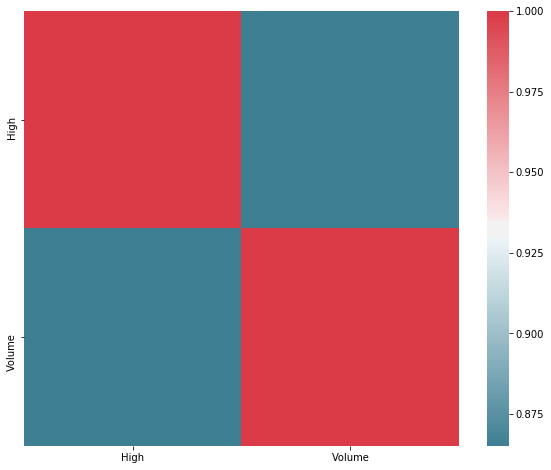

In [20]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [21]:
corr =exuberant_blah[['High',"Volume"]].corr()
corr

,High,Volume
High,1,1
Volume,1,1


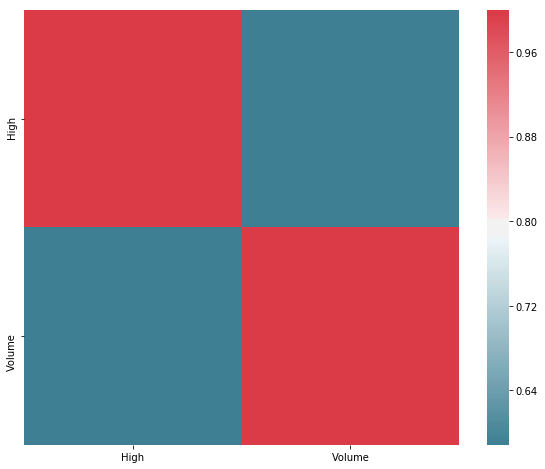

In [22]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [23]:
opposite_of_High=-1*blah.High
df = pd.concat([blah.High,opposite_of_High], axis=1)
df.tail()

,High,High
Date,,
2018-12-26,"3,924","-3,924"
2018-12-27,"3,889","-3,889"
2018-12-28,"4,008","-4,008"
2018-12-29,"4,004","-4,004"
2018-12-30,"3,925","-3,925"


In [24]:
corr =df.corr()
corr

,High,High
High,1,-1
High,-1,1


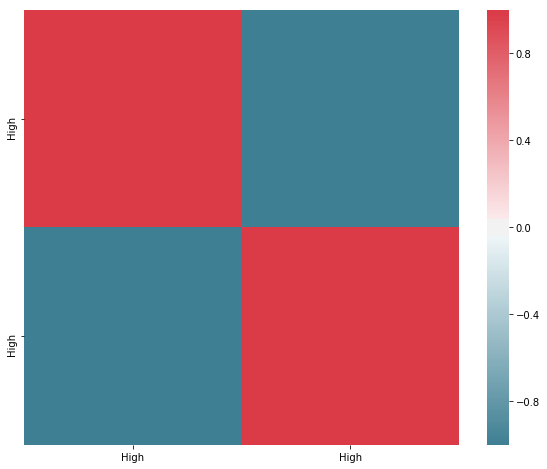

In [25]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

### Let's check out which dates have the max of everything

In [26]:
blah.idxmax(axis=0, skipna=True)

High        2017-12-17
Low         2017-12-17
Open        2017-12-17
Close       2017-12-16
Volume      2017-12-22
Adj Close   2017-12-16
dtype: datetime64[ns]

It says bitcoin price is the highest on Dec 17, 2017, and the highest trading volume on Dec 12, 22. 
People seemed very excited about bitcoin. 
Let's take a look at those dates.

In [27]:
blah.loc["2017-12-17":"2017-12-22"]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-17,"19,871","18,751","19,347","19,066",2264650369,"19,066"
2017-12-18,"19,221","18,114","19,066","18,972",2597510049,"18,972"
2017-12-19,"19,022","16,813","18,971","17,524",3136709262,"17,524"
2017-12-20,"17,814","15,643","17,522","16,462",3791752510,"16,462"
2017-12-21,"17,302","14,953","16,461","15,632",2619295475,"15,632"
2017-12-22,"15,824","10,876","15,632","13,665",6245731508,"13,665"
